# ***Sentimet Detection ***

<img src='https://lh7-us.googleusercontent.com/hMugqAE1fclOcclkyRPat0yUusq6f0gbjw7fnD-APMdPp6a9oYlsCozJXCTs4nArtW34Zelk7BjxurNGBBfruLOzjvzZveWVFrzMfPomGzStHABqMLTqujRggjhiKYImdVnPxqquAUgzyDQ3MqAELsw' >

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snsr̥
%matplotlib inline

In [ ]:
# prompt: write code to connect google drive

from google.colab import drive
drive.mount('/content/drive')


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/dataset/sentimental_dataset/Reviews.csv', error_bad_lines=False)



<ipython-input-26-82ae8e73387d>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('/content/drive/MyDrive/dataset/sentimental_dataset/Reviews.csv', error_bad_lines=False)


In [ ]:
# prompt: check dataset top 10 rows and bottom  10 rows

data.head(10)
data.tail(10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
568444,568445,B001EO7N10,A2SD7TY3IOX69B,"BayBay ""BayBay Knows Best""",3,3,5,1245369600,Best Value for Chinese 5 Spice,"As a foodie, I use a lot of Chinese 5 Spice po..."
568445,568446,B001EO7N10,A2E5C8TTAED4CQ,S. Linkletter,2,2,5,1268006400,Five Spice Powder,"You can make this mix yourself, but the Star A..."
568446,568447,B001EO7N10,A2P9W8T7NTLG2Z,Andy,0,0,2,1328918400,Mixed wrong,I had ordered some of these a few months back ...
568447,568448,B001EO7N10,APWCOAVILK94B,"Real Named Person ""wowzee""",0,0,5,1322524800,"If its all natural, this is like panacea of Sp...","Hoping there is no MSG in this, this tastes ex..."
568448,568449,B001EO7N10,A1F6BHEYB7R6R7,James Braley,0,0,5,1308096000,Very large ground spice jars.,My only complaint is that there's so much of i...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...
568453,568454,B001LR2CU2,A3LGQPJCZVL9UC,srfell17,0,0,5,1338422400,Great Honey,"I am very satisfied ,product is as advertised,..."


In [ ]:

# dataset information finding
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [ ]:
# in the dataset check any null values

data.isnull().sum()


Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [ ]:
# delele null columns

data = data.dropna()


In [ ]:
# repeat check out any null values available or not

data.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [ ]:
# describe dataset

data.describe()


,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568411.000000,568411.000000,568411.000000,568411.000000,5.684110e+05
mean,284227.440964,1.743874,2.227876,4.183309,1.296261e+09
std,164099.020907,7.636781,8.288752,1.310368,4.803792e+07
min,1.000000,0.000000,0.000000,1.000000,9.393408e+08
25%,142114.500000,0.000000,0.000000,4.000000,1.271290e+09
50%,284224.000000,0.000000,1.000000,5.000000,1.311120e+09
75%,426341.500000,2.000000,2.000000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.000000,5.000000,1.351210e+09


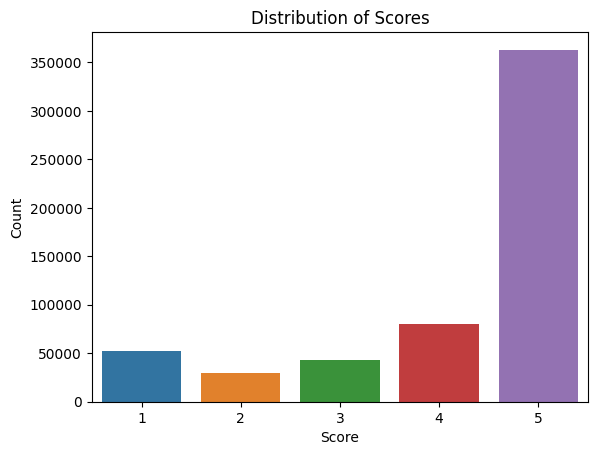

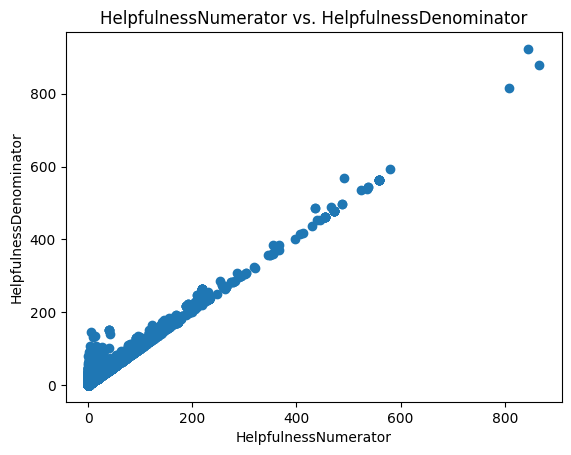

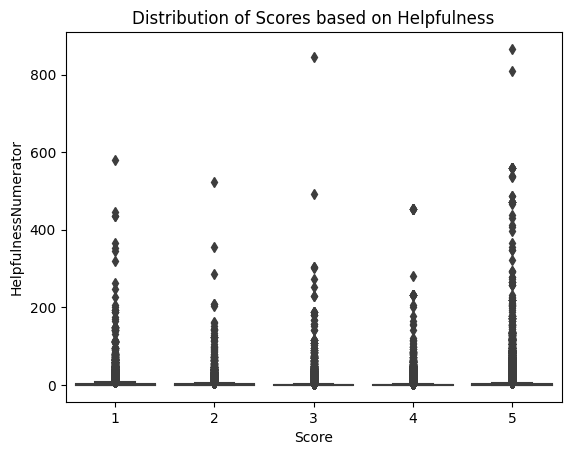

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Visualization of the 'Score' distribution
sns.countplot(x='Score', data=data)
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

# Scatter plot of HelpfulnessNumerator vs. HelpfulnessDenominator
plt.scatter(data['HelpfulnessNumerator'], data['HelpfulnessDenominator'])
plt.title('HelpfulnessNumerator vs. HelpfulnessDenominator')
plt.xlabel('HelpfulnessNumerator')
plt.ylabel('HelpfulnessDenominator')
plt.show()

# Distribution of Scores based on Helpfulness
sns.boxplot(x='Score', y='HelpfulnessNumerator', data=data)
plt.title('Distribution of Scores based on Helpfulness')
plt.xlabel('Score')
plt.ylabel('HelpfulnessNumerator')
plt.show()


In [ ]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer


In [ ]:
# Assuming your text data is in the 'Text' column of the DataFrame
data['Text'] = data['Text'].astype(str)  # Ensure 'Text' column is treated as strings

# Example of simple text cleaning (you may need more sophisticated cleaning based on your data)
data['Cleaned_Text'] = data['Text'].apply(lambda x: ' '.join([word.lower() for word in x.split()]))


In [ ]:
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

data['Sentiment_Score'] = data['Cleaned_Text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Assign sentiment labels based on the compound score
data['Sentiment_Label'] = data['Sentiment_Score'].apply(lambda score: 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral'))


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# Display a subset of the DataFrame with relevant columns
print(data[['Text', 'Sentiment_Score', 'Sentiment_Label']].head())


                                                Text  Sentiment_Score  \
0  I have bought several of the Vitality canned d...           0.9441   
1  Product arrived labeled as Jumbo Salted Peanut...          -0.5664   
2  This is a confection that has been around a fe...           0.8265   
3  If you are looking for the secret ingredient i...           0.0000   
4  Great taffy at a great price.  There was a wid...           0.9468   

  Sentiment_Label  
0        Positive  
1        Negative  
2        Positive  
3         Neutral  
4        Positive  


# ***try To predict sentiments***


<img  src='https://miro.medium.com/v2/resize:fit:1200/1*t_HKpbLn-ty1WTjuzR3ilA.png' width=700 height=300 >

In [ ]:
# prompt: create function and text and find user sentiment_label

def get_sentiment_label(text):
  sia = SentimentIntensityAnalyzer()
  score = sia.polarity_scores(text)['compound']
  return 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral')

get_sentiment_label("Great taffy at a great price.  There was a wide assortment of yummy taffy.  Delivery was very quick.  If your a taffy lover, this is a deal.")

'Positive'

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

def get_sentiment(text):
    # Create a SentimentIntensityAnalyzer
    sia = SentimentIntensityAnalyzer()

    # Clean the text (you may need more sophisticated cleaning based on your data)
    cleaned_text = ' '.join([word.lower() for word in text.split()])

    # Get the sentiment score
    sentiment_score = sia.polarity_scores(cleaned_text)['compound']

    # Assign sentiment label based on the compound score
    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Example usage:
text_example = "I like this product! It's very good."
sentiment_result = get_sentiment(text_example)
print(f"Sentiment: {sentiment_result}")



Sentiment: Positive


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

def get_sentiment(text):
    # Create a SentimentIntensityAnalyzer
    sia = SentimentIntensityAnalyzer()

    # Clean the text (you may need more sophisticated cleaning based on your data)
    cleaned_text = ' '.join([word.lower() for word in text.split()])

    # Get the sentiment score
    sentiment_score = sia.polarity_scores(cleaned_text)['compound']

    # Assign sentiment label based on the compound score
    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Example usage:
text_example = "The candy is just red , No flavor . Just  plan and chewy .  I would never buy them again"
sentiment_result = get_sentiment(text_example)
print(f"Sentiment: {sentiment_result}")


Sentiment: Negative
